# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

# import numpy and pandas



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
import re 
fifa["ValueNumeric"]=fifa.Value.str.replace(r'[€MK]',r'').astype(float)
fifa["ValueNumeric"] = pd.to_numeric(fifa["ValueNumeric"]) 
fifa.head()
# No he sabido dividir las "K" entre 1000, por favor Felipe dime como lo harías tu.
# Sigo adelante con el el lab

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Cambio el nombre de la columna porque usando df['A'] no me sale.
fifa = fifa.rename(columns={"Preferred Foot":"Preferred_Foot"})

In [14]:
lm = ols('ValueNumeric ~ C(Preferred_Foot)+C(Position)',data=fifa).fit()
anova = sm.stats.anova_lm(lm, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),7.292211e+04,1.0,0.871795,3.504713e-01
C(Position),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

Son significativas entre sí las 2 variables.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [16]:
lm = ols('ValueNumeric ~ C(Nationality)',data=fifa).fit()
anova2 = sm.stats.anova_lm(lm, typ=2)
anova2

,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
Es significativa

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [17]:
fifa.dropna( axis=0, inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [18]:
X=fifa[["SprintSpeed", "Stamina"]]
X = sm.add_constant(X)

# What we want to predict
Y = fifa["ValueNumeric"]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Wed, 08 Jul 2020   Prob (F-statistic):             0.0116
Time:                        20:00:03   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

R cuadrado es 0 las variables no presentan correlación.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [19]:
X = sm.add_constant(fifa['Potential'])
Y= fifa.ValueNumeric
model_potential = sm.OLS(Y, X).fit()

model_potential.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          9.15e-225
Time:                        20:18:46   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

R cuadrado es 0.056 las variables no presentan correlación.


In [22]:
fifa.corr()

,Age,Overall,Potential,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
Age,1.000000,0.453252,-0.252799,0.060193,-0.158441,-0.150996,0.099725,0.334980,0.156305,0.267105,0.199092,0.084534,0.189320,0.140348,-0.044964
Overall,0.453252,1.000000,0.660850,0.211741,0.197856,0.211919,0.367111,0.351064,0.422182,0.396719,0.322788,0.358130,0.501137,0.342354,-0.233667
Potential,-0.252799,0.660850,1.000000,0.161411,0.235875,0.237933,0.202373,0.075014,0.266765,0.170385,0.155150,0.245681,0.348128,0.224547,-0.235739
Weak Foot,0.060193,0.211741,0.161411,1.000000,0.259768,0.247467,0.231145,-0.009027,0.354566,0.130735,0.052928,0.345879,0.337568,0.328664,-0.050415
Acceleration,-0.158441,0.197856,0.235875,0.259768,1.000000,0.921814,0.606839,-0.167522,0.579617,0.250225,0.151594,0.681759,0.461150,0.532641,-0.004936
SprintSpeed,-0.150996,0.211919,0.237933,0.247467,0.921814,1.000000,0.619422,-0.084212,0.560929,0.278254,0.163165,0.664762,0.429139,0.520800,-0.001447
Stamina,0.099725,0.367111,0.202373,0.231145,0.606839,0.619422,1.000000,0.263863,0.596221,0.646075,0.576375,0.640987,0.472008,0.515637,-0.018361
Strength,0.334980,0.351064,0.075014,-0.009027,-0.167522,-0.084212,0.263863,1.000000,0.050438,0.473778,0.357007,0.007822,-0.047170,0.054316,-0.010699
LongShots,0.156305,0.422182,0.266765,0.354566,0.579617,0.560929,0.596221,0.050438,1.000000,0.393946,0.194497,0.861165,0.753223,0.812658,-0.088924
Aggression,0.267105,0.396719,0.170385,0.130735,0.250225,0.278254,0.646075,0.473778,0.393946,1.000000,0.751600,0.383548,0.300561,0.337642,-0.054774


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

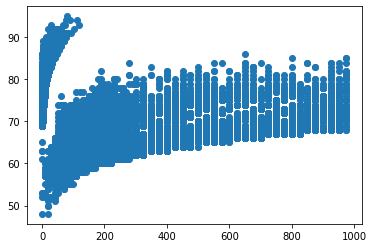

In [21]:
import matplotlib.pyplot as plt
plt.scatter(fifa["ValueNumeric"],fifa["Potential"])
